In [1]:
# 0.1 mb_Taxi_main/ Programa principal

### Librerías a utilizar

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from src.baja_datos_taxi import load_monthly_data
from src.preprocesamiento import preprocess


#### Cargamos los datos

In [3]:
#programa principal

# Llamar a la función para obtener los DataFrames
dataframes = load_monthly_data()

# Acceso a cada dataframe
taxi_data_01 = dataframes['taxi_data_01']
taxi_data_02 = dataframes['taxi_data_02']
taxi_data_03 = dataframes['taxi_data_03']
taxi_data_04 = dataframes['taxi_data_04']
taxi_data_05 = dataframes['taxi_data_05']
taxi_data_06 = dataframes['taxi_data_06']
taxi_data_07 = dataframes['taxi_data_07']
taxi_data_08 = dataframes['taxi_data_08']
taxi_data_09 = dataframes['taxi_data_09']
taxi_data_10 = dataframes['taxi_data_10']
taxi_data_11 = dataframes['taxi_data_11']
taxi_data_12 = dataframes['taxi_data_12']

# Mostrar un ejemplo de DataFrame
display(taxi_data_12.head())

Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-02.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-03.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-04.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-05.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-06.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-07.parquet cargado en DataFrame correctamente.
Archivo https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-08.parquet cargado en DataFrame correctamente.
Archivo 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
877961,1,2020-12-19 13:16:26,2020-12-19 13:33:49,3.0,2.40,1.0,N,142,140,1,13.0,2.5,0.5,3.25,0.0,0.3,19.55,2.5,NaN
899607,2,2020-12-19 19:31:33,2020-12-19 19:36:46,4.0,1.01,1.0,N,237,229,2,6.0,0.0,0.5,0.00,0.0,0.3,9.30,2.5,NaN
1276395,2,2020-12-29 22:51:43,2020-12-29 23:04:58,1.0,2.84,1.0,N,239,229,1,12.0,0.5,0.5,3.16,0.0,0.3,18.96,2.5,NaN
591192,1,2020-12-12 21:09:32,2020-12-12 21:15:50,1.0,1.60,1.0,N,48,90,1,7.0,3.0,0.5,2.00,0.0,0.3,12.80,2.5,NaN
1152808,1,2020-12-26 12:35:28,2020-12-26 12:41:53,1.0,1.10,1.0,N,238,239,1,7.0,2.5,0.5,1.65,0.0,0.3,11.95,2.5,NaN


### Entrenamiento
* Utilizaremos el modelo de clasificación Random Forest con la data de Enero 2020
* Por temas de tiempo de procesamiento, el cada dataset mensual será acotado a 100.000 registros
* Usaremos el paquete SKLEARN

In [4]:
#Preparamos el prep procesamiento
numeric_feat = [
    "pickup_weekday",
    "pickup_hour",
    'work_hours',
    "pickup_minute",
    "passenger_count",
    'trip_distance',
    'trip_time',
    'trip_speed'
]
categorical_feat = [
    "PULocationID",
    "DOLocationID",
    "RatecodeID",
]
features = numeric_feat + categorical_feat

In [5]:
#pre procesamos
taxi = taxi_data_01
target_col = "high_tip"
taxi_train = preprocess(df=taxi, target_col=target_col)

In [6]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(taxi_train[features], taxi_train[target_col], test_size=0.2, random_state=42)

In [7]:
%%time
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(taxi_train[features], taxi_train[target_col])

CPU times: user 7.92 s, sys: 43.3 ms, total: 7.97 s
Wall time: 8.02 s


RandomForestClassifier(max_depth=10)

#### Hacemos predicción en el conjunto de prueba

In [8]:
# Hacer predicciones en el conjunto de prueba
y_pred = rfc.predict(X_test)

# Calcular el F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")

F1 score: 0.7346755843618563


#### Extendamos el análisis a todos los meses con las posibles métricas

Metrics for month taxi_data_01: F1=0.741160874140688, Accuracy=0.619832388216992, Precision=0.6018333555289208, Recall=0.9644317979726125, ROC AUC=0.6333966205045543
Metrics for month taxi_data_02: F1=0.7320021411099893, Accuracy=0.6030090733900755, Precision=0.5975397957942012, Recall=0.9445513044694691, ROC AUC=0.589224682283533
Metrics for month taxi_data_03: F1=0.7233785863852564, Accuracy=0.5993935073150649, Precision=0.5881258667147705, Recall=0.9394190423022205, ROC AUC=0.6025321112570338
Metrics for month taxi_data_04: F1=0.6084931388251591, Accuracy=0.5450649389845172, Precision=0.478506556283275, Recall=0.8354412324077596, ROC AUC=0.6201371503058469
Metrics for month taxi_data_05: F1=0.6121719624746933, Accuracy=0.5897876704065629, Precision=0.47691191280137435, Recall=0.8545309804962187, ROC AUC=0.6810127328275319
Metrics for month taxi_data_06: F1=0.646602842283102, Accuracy=0.5709588875818177, Precision=0.5123971281189704, Recall=0.8760575391037005, ROC AUC=0.6403170189593

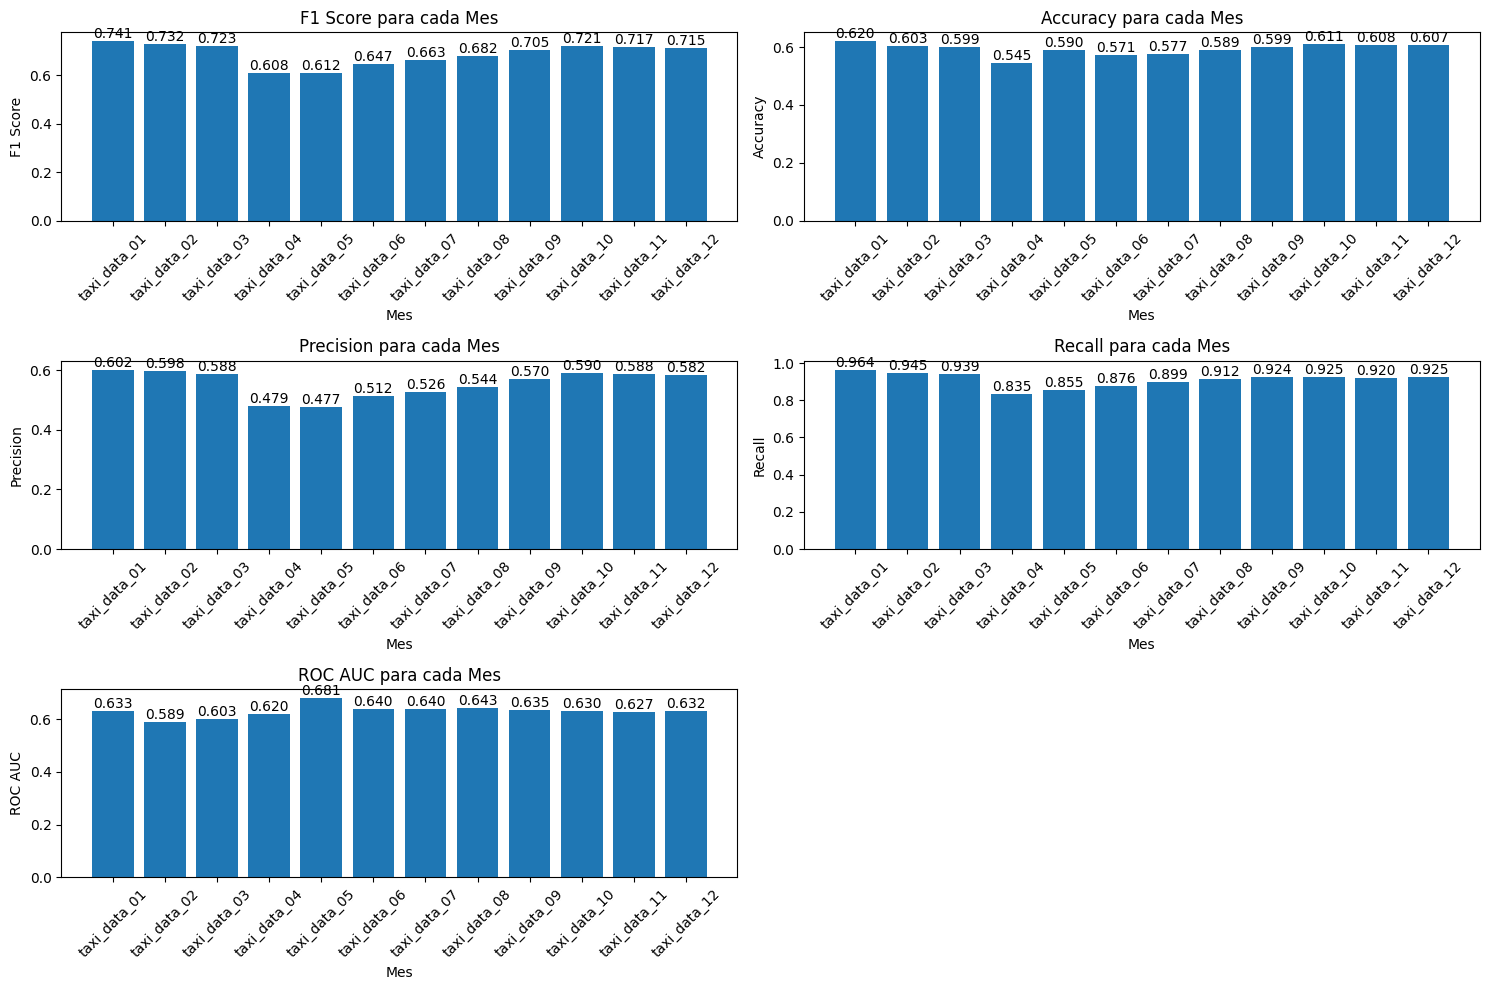

In [9]:
# Lista de DataFrames para los meses de enero a diciembre
months = [f"{i:02d}" for i in range(1, 13)]
dataframes = {f"taxi_data_{month}": globals()[f"taxi_data_{month}"] for month in months}

# Diccionario para almacenar las métricas
metrics = {
    "F1 Score": {},
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "ROC AUC": {}
}
# Diccionario para almacenar estadísticas descriptivas
descriptive_stats = {feature: {"mean": [], "std": []} for feature in features + [target_col]}

# Iterar sobre los meses, preprocesar, predecir y calcular las métricas
for month, df in dataframes.items():
    df_preprocessed = preprocess(df=df, target_col=target_col)
    y_true = df_preprocessed[target_col]
    y_pred = rfc.predict(df_preprocessed[features])
    y_pred_proba = rfc.predict_proba(df_preprocessed[features])[:, 1]
    
    # Calcular métricas
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Almacenar métricas
    metrics["F1 Score"][month] = f1
    metrics["Accuracy"][month] = accuracy
    metrics["Precision"][month] = precision
    metrics["Recall"][month] = recall
    metrics["ROC AUC"][month] = roc_auc
    
    # Calcular y almacenar estadísticas descriptivas
    for feature in features + [target_col]:
        mean = df_preprocessed[feature].mean()
        std = df_preprocessed[feature].std()
        descriptive_stats[feature]["mean"].append(mean)
        descriptive_stats[feature]["std"].append(std)

    print(f"Metrics for month {month}: F1={f1}, Accuracy={accuracy}, Precision={precision}, Recall={recall}, ROC AUC={roc_auc}")

# Visualizar las métricas en gráficos de barras
plt.figure(figsize=(15, 10))
for i, (metric, scores) in enumerate(metrics.items(), 1):
    plt.subplot(3, 2, i)
    bars = plt.bar(scores.keys(), scores.values())
    plt.xlabel('Mes')
    plt.ylabel(metric)
    plt.title(f'{metric} para cada Mes')
    plt.xticks(rotation=45)
    
    # Añadir las métricas encima de cada barra
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### ¿Qué estrategia usaría para explicar/demostrar el comportamiento distinto del modelo para cada mes del análisis? Desarrolle una estrategia y súmela al código. Ejecútela y comente los resultados.


#### Una estrategia es analizar la distribución de las variables de entrada y la distribución de las etiquetas de cada mes. Esto puede proporcionar una comprensión de por qué el modelo podría estar funcionando de manera diferente en distintos meses.

#### A lo anterior se puede agregar análisis de Estadística Descriptiva de las variables de entrada y de las etiquetas respectivas, ya que ayudan a identificar si hay diferencias significativas en los datos que podrían afectar el performance del modelo.

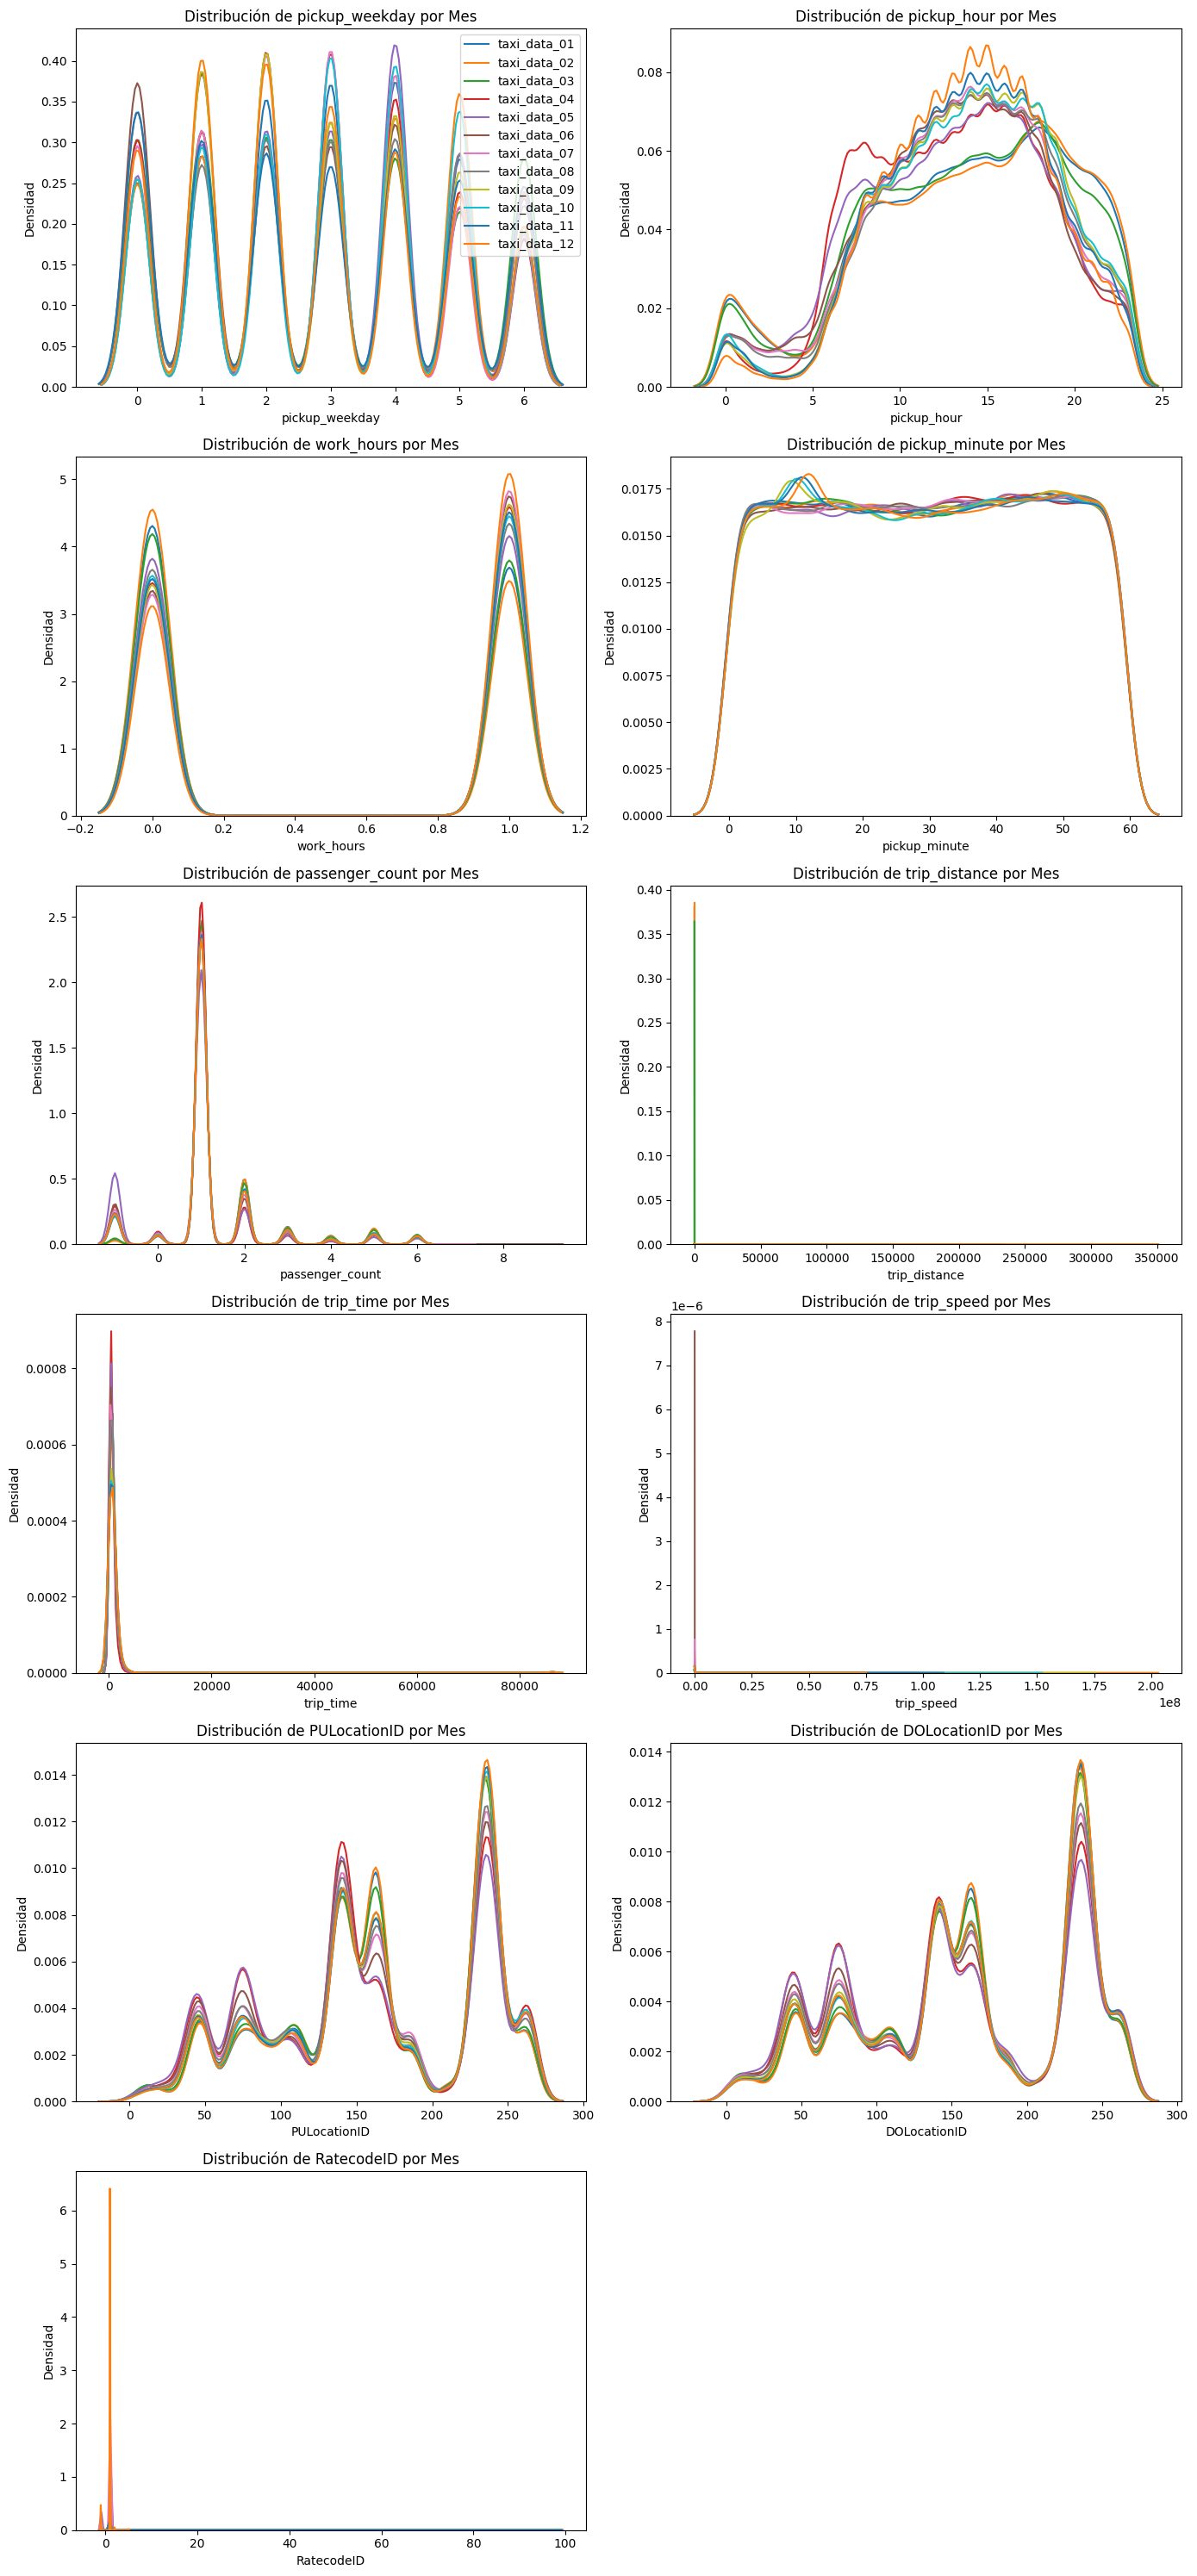

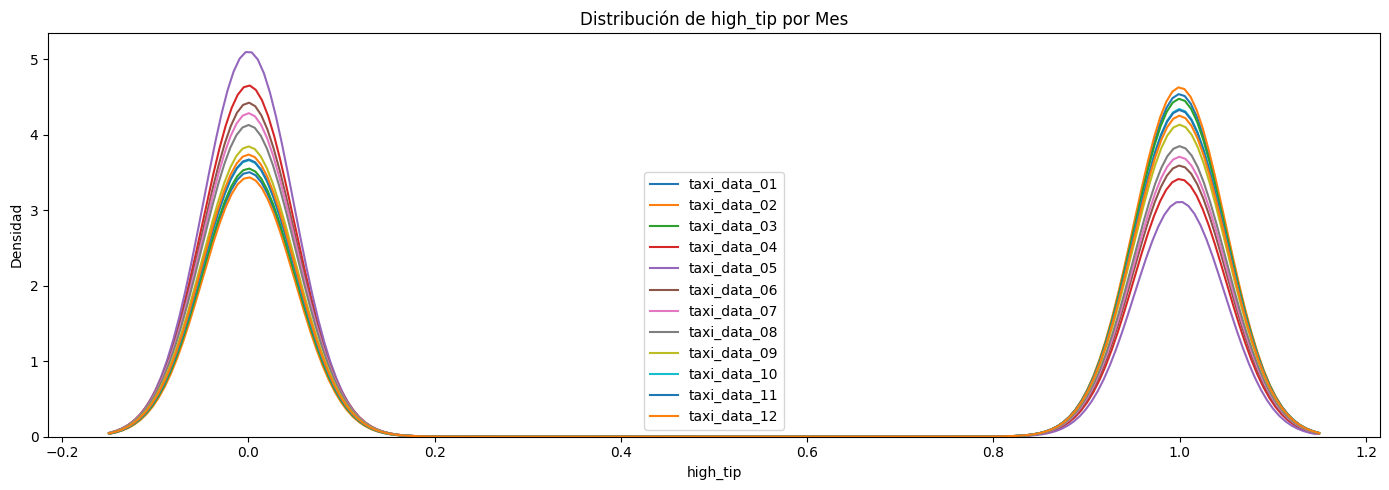

In [10]:
# Estrategia: Análisis de la Distribución de las Características y Etiquetas

num_features = len(features)
num_plots = num_features // 2 + num_features % 2

plt.figure(figsize=(14, 5 * num_plots))
for i, feature in enumerate(features, 1):
    plt.subplot(num_plots, 2, i)
    for month, df in dataframes.items():
        df_preprocessed = preprocess(df=df, target_col=target_col)
        sns.kdeplot(df_preprocessed[feature], label=month)
    plt.title(f'Distribución de {feature} por Mes')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    if i == 1:
        plt.legend()

plt.tight_layout()
plt.show()

# Análisis de la Distribución de las Etiquetas
plt.figure(figsize=(14, 5))
for month, df in dataframes.items():
    df_preprocessed = preprocess(df=df, target_col=target_col)
    sns.kdeplot(df_preprocessed[target_col], label=month)
plt.title(f'Distribución de {target_col} por Mes')
plt.xlabel(target_col)
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

#### Visualización de la Estadística Descriptiva de las variables

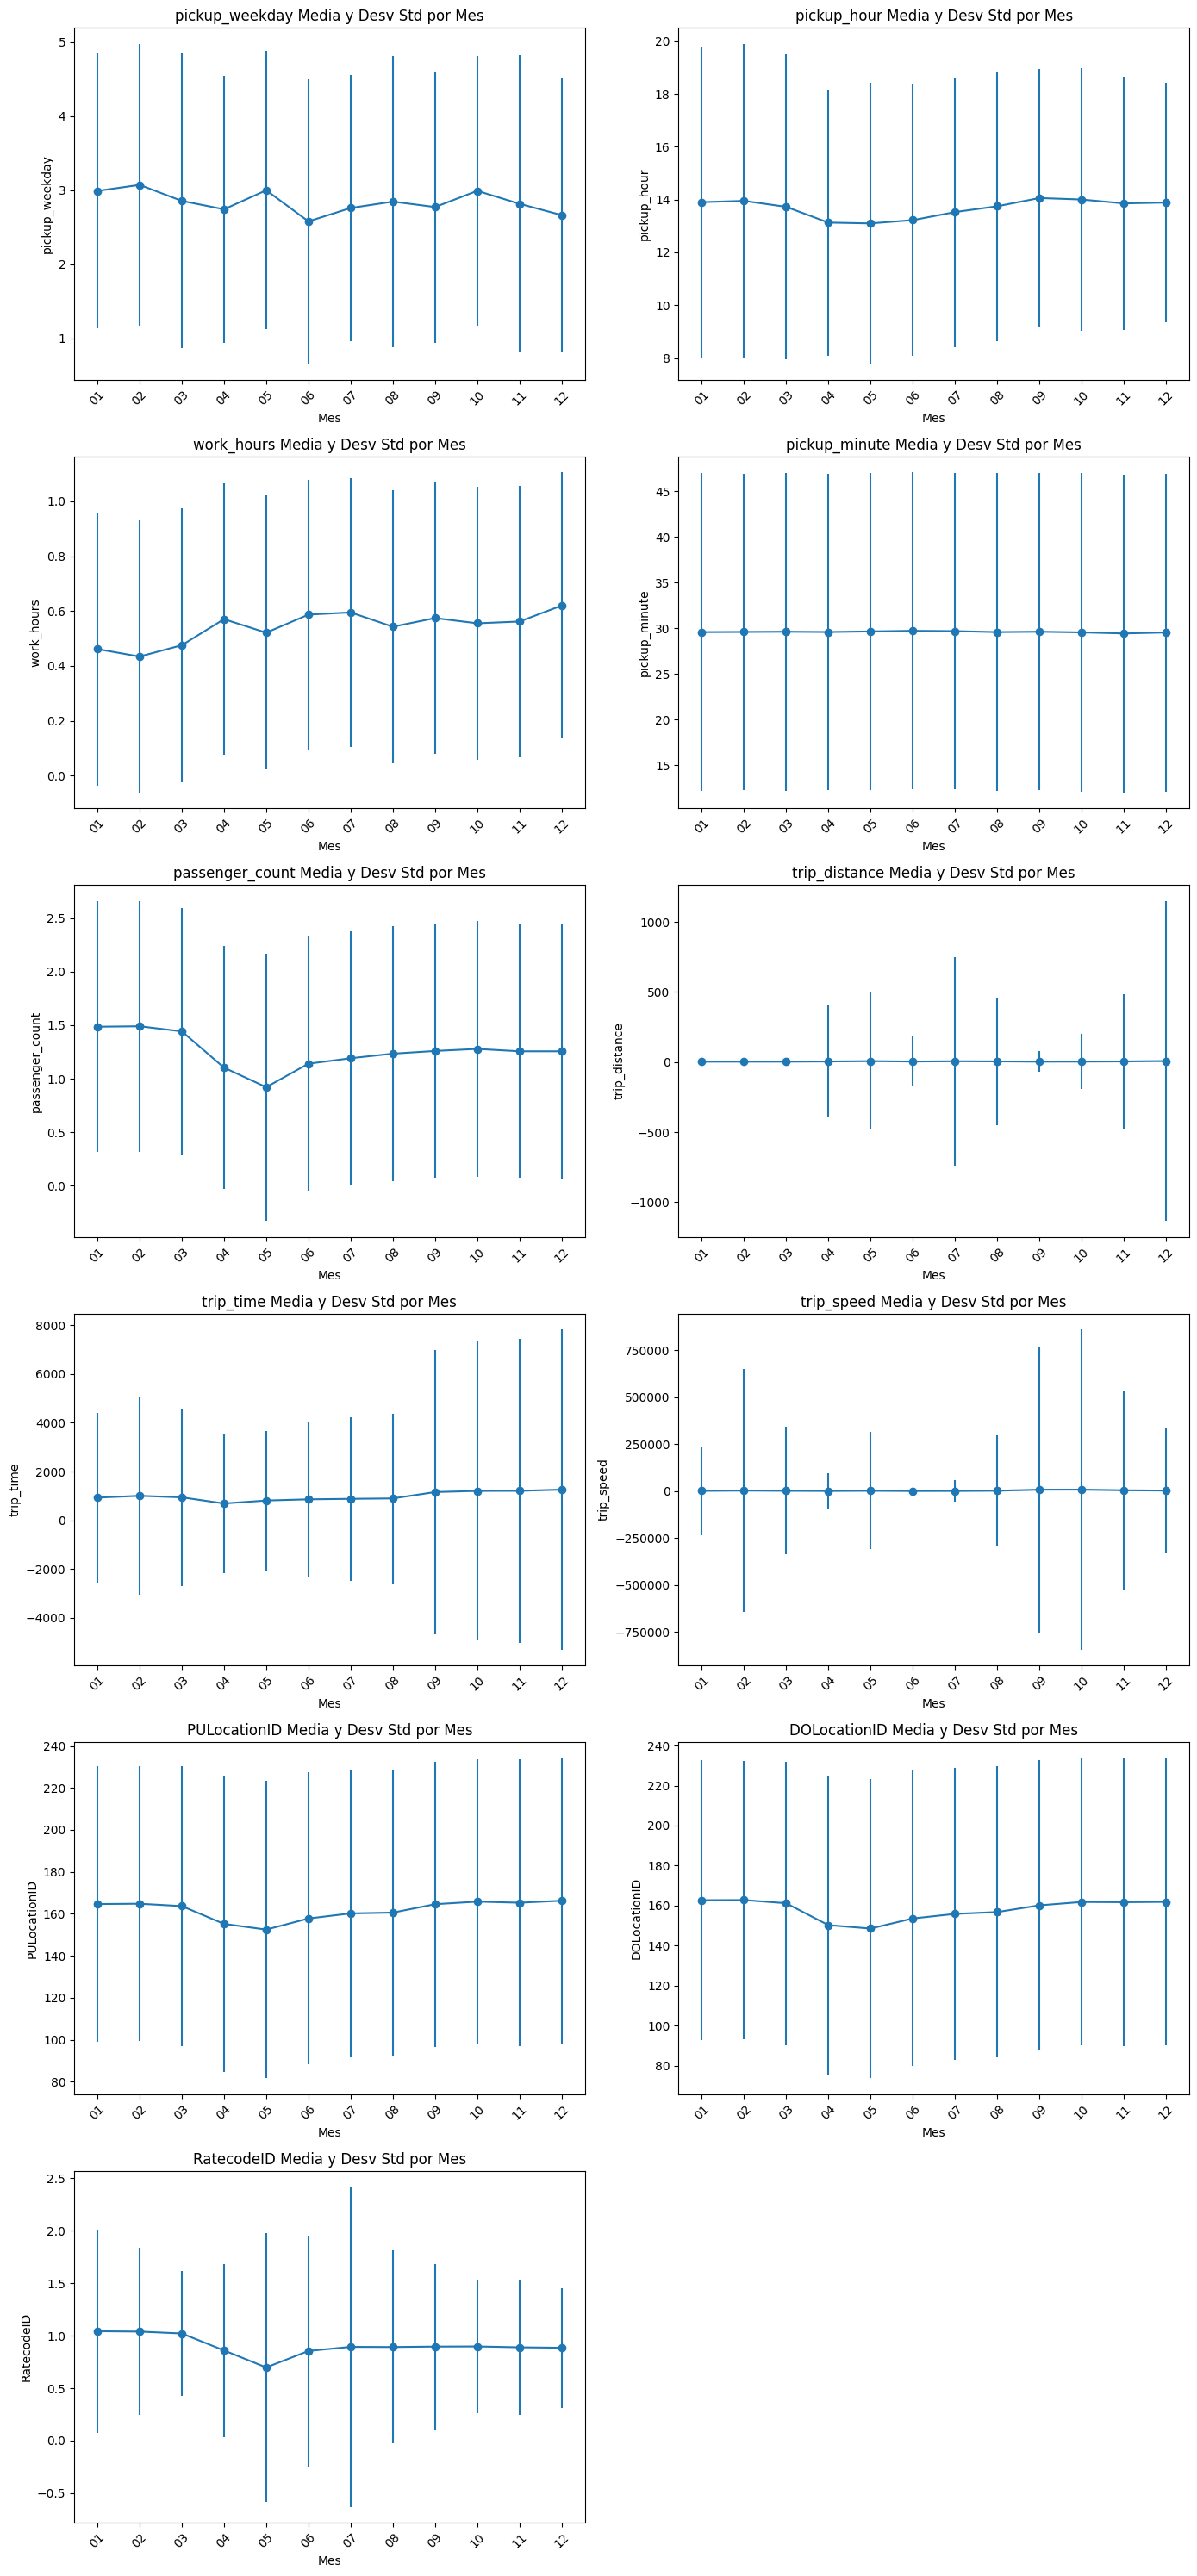

In [11]:
# Visualizar las estadísticas descriptivas

plt.figure(figsize=(14, 5 * num_plots))
for i, feature in enumerate(features, 1):
    plt.subplot(num_plots, 2, i)
    plt.errorbar(months, descriptive_stats[feature]["mean"], yerr=descriptive_stats[feature]["std"], fmt='-o')
    plt.title(f'{feature} Media y Desv Std por Mes')
    plt.xlabel('Mes')
    plt.ylabel(f'{feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()